In [1]:
# importing necessaty libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # visualization library
import seaborn as sns # visulaization library
from scipy.stats import trim_mean
import wquantiles # used to calculate the wighted quantiles
from statsmodels import robust # for calculating the mean absolute deviaition
from scipy.stats import norm
from scipy import stats

In [2]:
df = pd.read_csv(r"C:\Users\sageo\OneDrive\Desktop\machine learning\houshold.csv")

In [3]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income
0,56,Master's,Technology,5,Urban,21,Married,Full-time,7,Own,Apartment,Male,Public transit,72510
1,69,High School,Finance,0,Urban,4,Single,Full-time,7,Own,Apartment,Male,Biking,75462
2,46,Bachelor's,Technology,1,Urban,1,Single,Full-time,7,Own,Single-family home,Female,Car,71748
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520
4,60,Bachelor's,Finance,3,Urban,15,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Age                             10000 non-null  int64 
 1   Education_Level                 10000 non-null  object
 2   Occupation                      10000 non-null  object
 3   Number_of_Dependents            10000 non-null  int64 
 4   Location                        10000 non-null  object
 5   Work_Experience                 10000 non-null  int64 
 6   Marital_Status                  10000 non-null  object
 7   Employment_Status               10000 non-null  object
 8   Household_Size                  10000 non-null  int64 
 9   Homeownership_Status            10000 non-null  object
 10  Type_of_Housing                 10000 non-null  object
 11  Gender                          10000 non-null  object
 12  Primary_Mode_of_Transportation  10000 non-null 

# Univariate analysis for numerical features 

In [5]:
for i in df:
    if i=='Age' or i=='Work_Experience' or i=='Income':
        mean = df[i].mean()
        median = df[i].median()
        mode = df[i].mode()[0]
        std_dev = df[i].std()
        variance = df[i].var()
        range_ = df[i].max() - df[i].min()
        iqr = df[i].quantile(0.75) - df[i].quantile(0.25)
        skewness = df[i].skew()
        kurtosis = df[i].kurt()

        print(f"Mean of {i}: {mean}")
        print(f"Median of {i}: {median}")
        print(f"Mode of {i}: {mode}")
        print(f"Standard Deviation of {i}: {std_dev}")
        print(f"Variance of {i}: {variance}")
        print(f"Range of {i}: {range_}")
        print(f"IQR of {i}: {iqr}")
        print(f"Skewness of {i}: {skewness}")
        print(f"Kurtosis of {i}: {kurtosis}")
        print('\n')

Mean of Age: 44.0217
Median of Age: 44.0
Mode of Age: 43
Standard Deviation of Age: 15.203997673787208
Variance of Age: 231.16154526452684
Range of Age: 52
IQR of Age: 26.0
Skewness of Age: 0.0021840679679087363
Kurtosis of Age: -1.1832592441266414


Mean of Work_Experience: 24.8588
Median of Work_Experience: 25.0
Mode of Work_Experience: 2
Standard Deviation of Work_Experience: 14.652622034750292
Variance of Work_Experience: 214.69933249324978
Range of Work_Experience: 50
IQR of Work_Experience: 25.0
Skewness of Work_Experience: -0.0025799471996250023
Kurtosis of Work_Experience: -1.1904278352824038


Mean of Income: 816838.1667
Median of Income: 72943.0
Mode of Income: 74306
Standard Deviation of Income: 1821089.3303742837
Variance of Income: 3316366349203.0566
Range of Income: 9961527
IQR of Income: 282221.5
Skewness of Income: 2.9831770918701603
Kurtosis of Income: 8.633418809338727




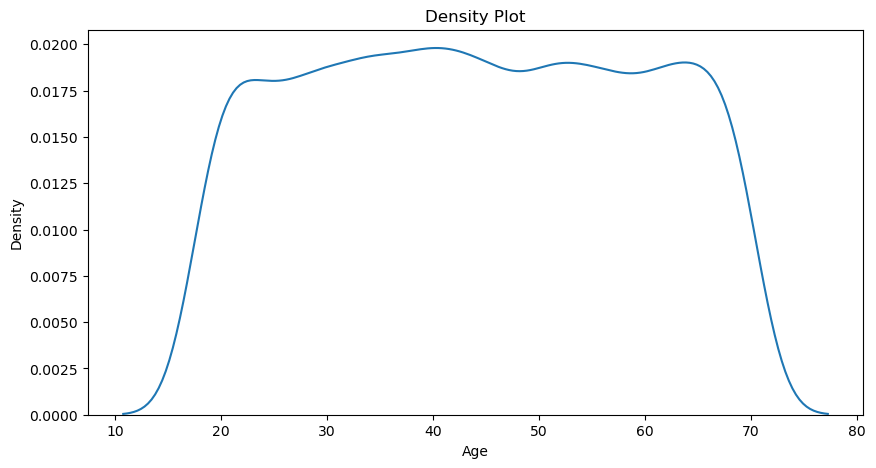

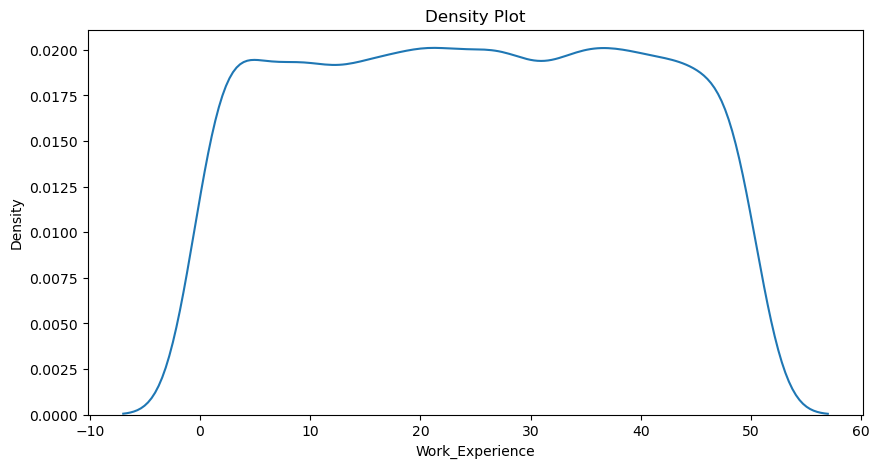

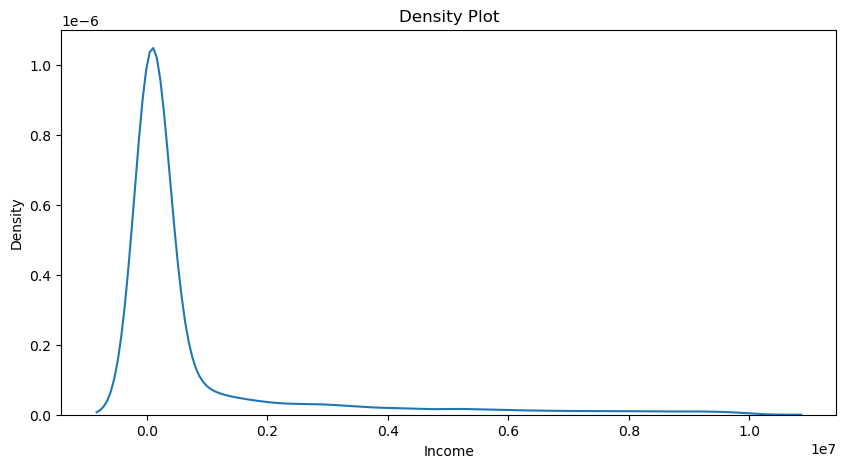

In [6]:
for i in df:
    if i=='Age' or i=='Work_Experience' or i=='Income':
        plt.figure(figsize=(10, 5))
        sns.kdeplot(df[i])
        plt.title('Density Plot')
        plt.xlabel(i)
        plt.ylabel('Density')
        plt.show()

In [7]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income'],
      dtype='object')

***Age - Transformation***

C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\1227199667.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Age'], shade=True, color='blue')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\1227199667.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sqrt_Age'], shade=True, color='green')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\1227199667.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log_Age'], shade=True, color='red')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\1227199667.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will beco

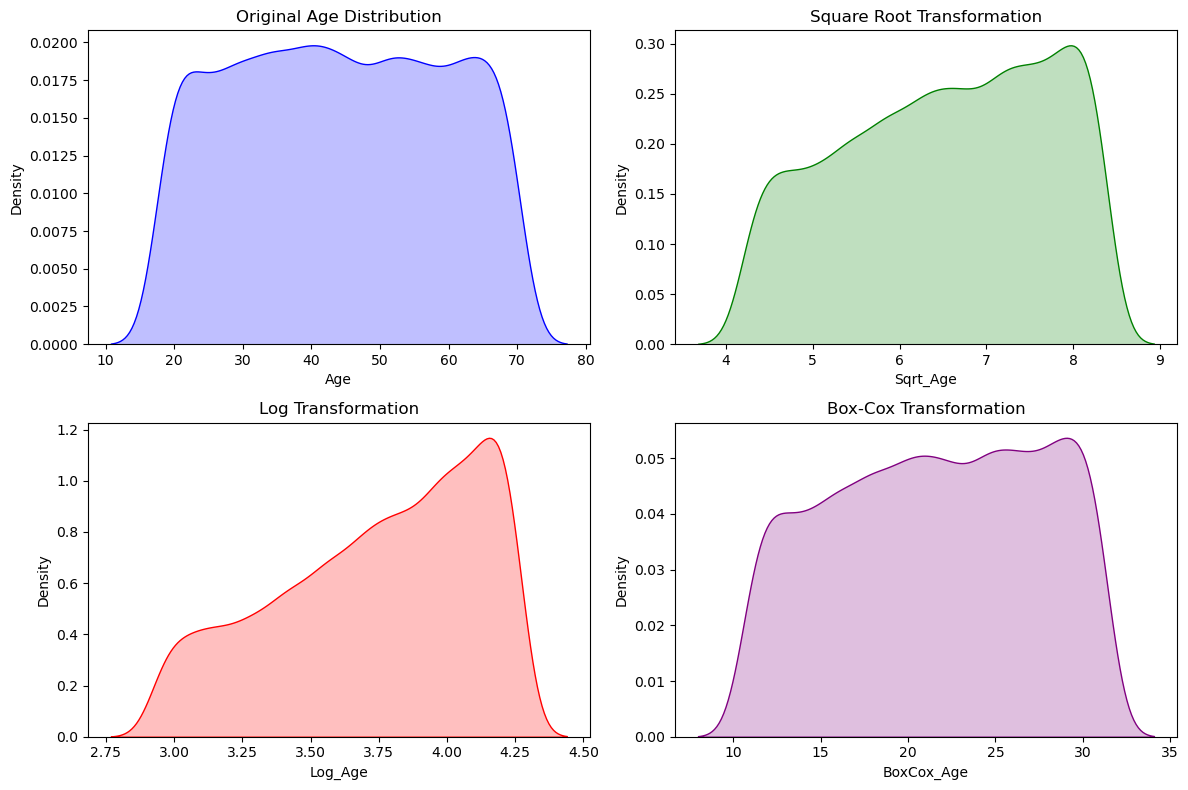

In [8]:
# Apply square root transformation
df['Sqrt_Age'] = np.sqrt(df['Age'])

# Apply log transformation
df['Log_Age'] = np.log(df['Age'] + 1)

# Apply Box-Cox transformation
df['BoxCox_Age'], fitted_lambda = stats.boxcox(df['Age'] + 1)

# Plot the KDE plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.kdeplot(df['Age'], shade=True, color='blue')
plt.title('Original Age Distribution')

plt.subplot(2, 2, 2)
sns.kdeplot(df['Sqrt_Age'], shade=True, color='green')
plt.title('Square Root Transformation')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Log_Age'], shade=True, color='red')
plt.title('Log Transformation')

plt.subplot(2, 2, 4)
sns.kdeplot(df['BoxCox_Age'], shade=True, color='purple')
plt.title('Box-Cox Transformation')

plt.tight_layout()
plt.show()

In [9]:
print(df['Sqrt_Age'].skew())
print(df['Sqrt_Age'].kurt())

-0.2321789230988758
-1.0880514396613832


In [10]:
print(df['Log_Age'].skew())
print(df['Log_Age'].kurt())

-0.4708792103337929
-0.8692817826823505


In [11]:
print(df['BoxCox_Age'].skew())
print(df['BoxCox_Age'].kurt())

-0.10966795168508263
-1.1533788950045514


In [12]:
# Drop the Sqrt_Age and BoxCox_Age columns
df.drop(['Sqrt_Age', 'BoxCox_Age'], axis=1, inplace=True)  

In [13]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Work_Experience', 'Marital_Status', 'Employment_Status',
       'Household_Size', 'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income', 'Log_Age'],
      dtype='object')

***Work_Experience***

In [14]:
df[df['Work_Experience']>df['Age']-18]

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Work_Experience,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income,Log_Age
3,32,High School,Others,2,Urban,32,Married,Full-time,1,Own,Apartment,Female,Car,74520,3.496508
8,36,Master's,Finance,4,Suburban,45,Married,Full-time,2,Own,Apartment,Female,Public transit,69636,3.610918
10,28,Bachelor's,Healthcare,4,Urban,50,Married,Full-time,5,Rent,Townhouse,Female,Car,68944,3.367296
11,28,Master's,Healthcare,2,Urban,47,Married,Full-time,2,Own,Single-family home,Female,Car,66796,3.367296
16,41,High School,Technology,2,Urban,42,Married,Full-time,7,Rent,Apartment,Male,Car,1011213,3.737670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,38,Bachelor's,Others,2,Urban,35,Single,Full-time,1,Own,Single-family home,Female,Car,72780,3.663562
9994,49,High School,Healthcare,3,Rural,44,Married,Part-time,3,Own,Apartment,Male,Biking,95134,3.912023
9996,23,Master's,Technology,3,Urban,16,Divorced,Full-time,1,Own,Single-family home,Female,Biking,72676,3.178054
9997,41,Doctorate,Education,3,Urban,50,Single,Full-time,4,Own,Single-family home,Female,Public transit,2684820,3.737670


In [15]:
# Dropping the 'Work_Experience' column
df.drop('Work_Experience', axis=1, inplace=True)

In [16]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Marital_Status', 'Employment_Status', 'Household_Size',
       'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income', 'Log_Age'],
      dtype='object')

***Income***

In [17]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Drop outliers
df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound )]

In [18]:
df.head()

,Age,Education_Level,Occupation,Number_of_Dependents,Location,Marital_Status,Employment_Status,Household_Size,Homeownership_Status,Type_of_Housing,Gender,Primary_Mode_of_Transportation,Income,Log_Age
0,56,Master's,Technology,5,Urban,Married,Full-time,7,Own,Apartment,Male,Public transit,72510,4.043051
1,69,High School,Finance,0,Urban,Single,Full-time,7,Own,Apartment,Male,Biking,75462,4.248495
2,46,Bachelor's,Technology,1,Urban,Single,Full-time,7,Own,Single-family home,Female,Car,71748,3.850148
3,32,High School,Others,2,Urban,Married,Full-time,1,Own,Apartment,Female,Car,74520,3.496508
4,60,Bachelor's,Finance,3,Urban,Married,Self-employed,4,Own,Townhouse,Male,Walking,640210,4.110874


In [19]:
df.shape

(8069, 14)

In [20]:
df.Income.skew()

3.0885743731122055

In [21]:
df.Income.kurt()

9.179190950629659

C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\394171612.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Income'], shade=True, color='blue')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\394171612.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Sqrt_Income'], shade=True, color='green')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\394171612.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Log_Income'], shade=True, color='red')
C:\Users\sageo\AppData\Local\Temp\ipykernel_35184\394171612.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will

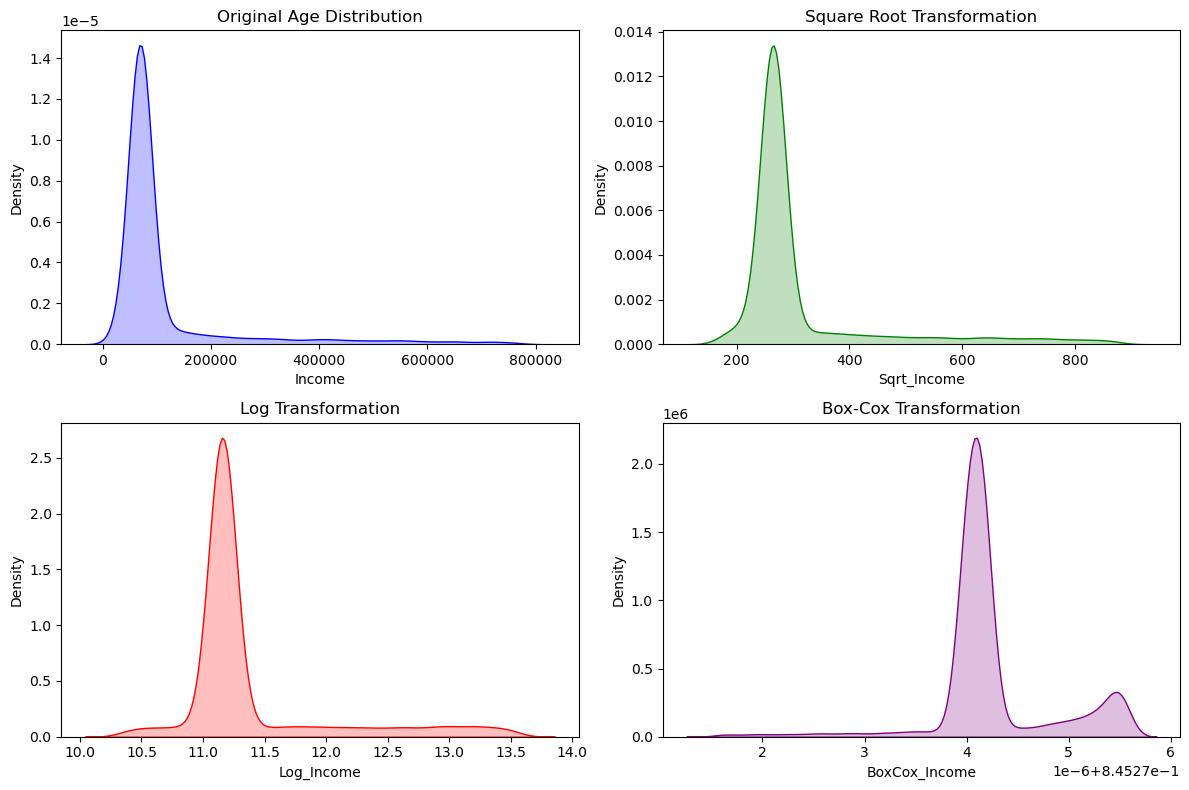

In [22]:
# Apply square root transformation
df['Sqrt_Income'] = np.sqrt(df['Income'])

# Apply log transformation
df['Log_Income'] = np.log(df['Income'] + 1)

# Apply Box-Cox transformation
df['BoxCox_Income'], fitted_lambda = stats.boxcox(df['Income'] + 1)

# Plot the KDE plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.kdeplot(df['Income'], shade=True, color='blue')
plt.title('Original Age Distribution')

plt.subplot(2, 2, 2)
sns.kdeplot(df['Sqrt_Income'], shade=True, color='green')
plt.title('Square Root Transformation')

plt.subplot(2, 2, 3)
sns.kdeplot(df['Log_Income'], shade=True, color='red')
plt.title('Log Transformation')

plt.subplot(2, 2, 4)
sns.kdeplot(df['BoxCox_Income'], shade=True, color='purple')
plt.title('Box-Cox Transformation')

plt.tight_layout()
plt.show()

In [23]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Marital_Status', 'Employment_Status', 'Household_Size',
       'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income', 'Log_Age', 'Sqrt_Income',
       'Log_Income', 'BoxCox_Income'],
      dtype='object')

In [24]:
print(df.Sqrt_Income.skew())
print(df.Sqrt_Income.kurt())

2.5609185321861316
5.796122093232549


In [25]:
print(df.Log_Income.skew())
print(df.Log_Income.kurt())

2.0270472042587357
3.3619491717362373


In [26]:
print(df.BoxCox_Income.skew())
print(df.BoxCox_Income.kurt())

0.0
3.2740660952996845


In [27]:
# Drop the Sqrt_Income and Log_Income columns
df.drop(['Sqrt_Income', 'Log_Income'], axis=1, inplace=True)  

In [28]:
df.columns

Index(['Age', 'Education_Level', 'Occupation', 'Number_of_Dependents',
       'Location', 'Marital_Status', 'Employment_Status', 'Household_Size',
       'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Income', 'Log_Age', 'BoxCox_Income'],
      dtype='object')

In [29]:
# Dropping the 'Income' column
df.drop('Income', axis=1, inplace=True)

In [30]:
# Dropping the 'Age' column
df.drop('Age', axis=1, inplace=True)

In [31]:
df.columns

Index(['Education_Level', 'Occupation', 'Number_of_Dependents', 'Location',
       'Marital_Status', 'Employment_Status', 'Household_Size',
       'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Log_Age', 'BoxCox_Income'],
      dtype='object')

# Univariate analysis for categorical columns 

Univariate Analysis for Education_Level:

Frequency Count:
Bachelor's     3278
High School    2336
Master's       2026
Doctorate       429
Name: Education_Level, dtype: int64

Mode:
Bachelor's


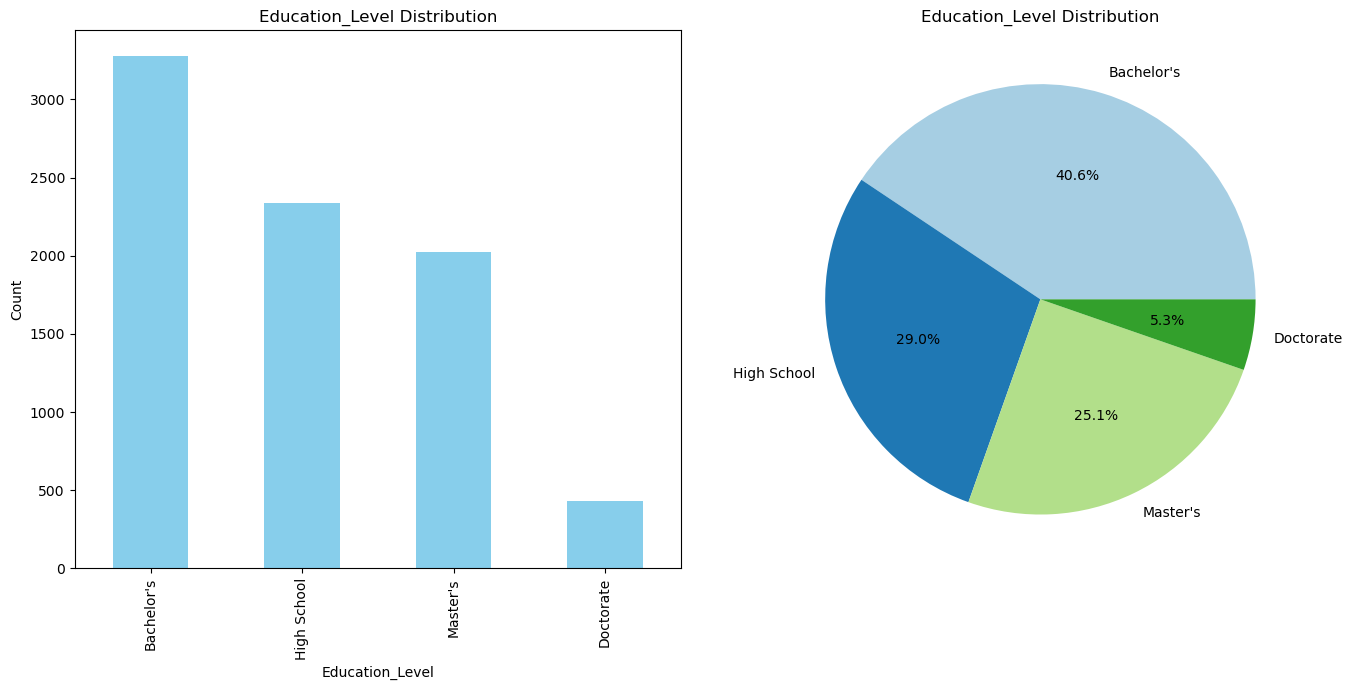



Univariate Analysis for Occupation:

Frequency Count:
Healthcare    2464
Technology    1953
Finance       1249
Others        1219
Education     1184
Name: Occupation, dtype: int64

Mode:
Healthcare


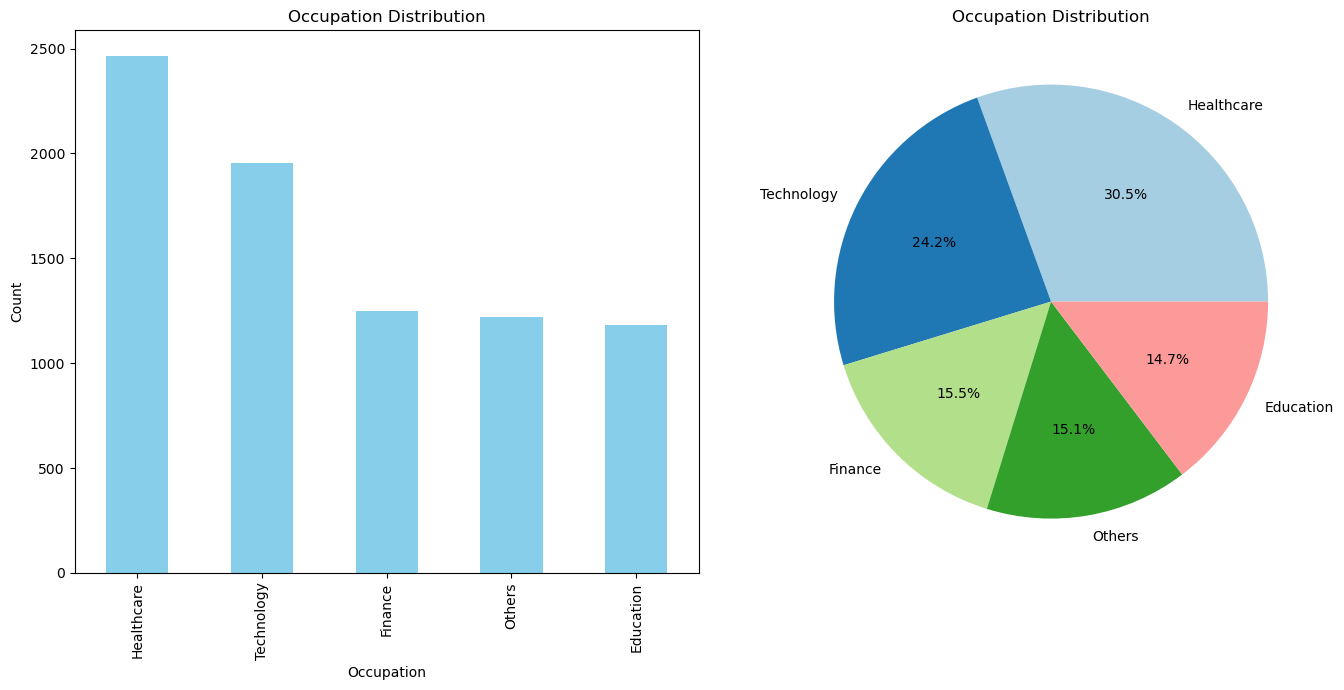



Univariate Analysis for Number_of_Dependents:

Frequency Count:
5    1394
3    1359
0    1352
1    1337
2    1317
4    1310
Name: Number_of_Dependents, dtype: int64

Mode:
5


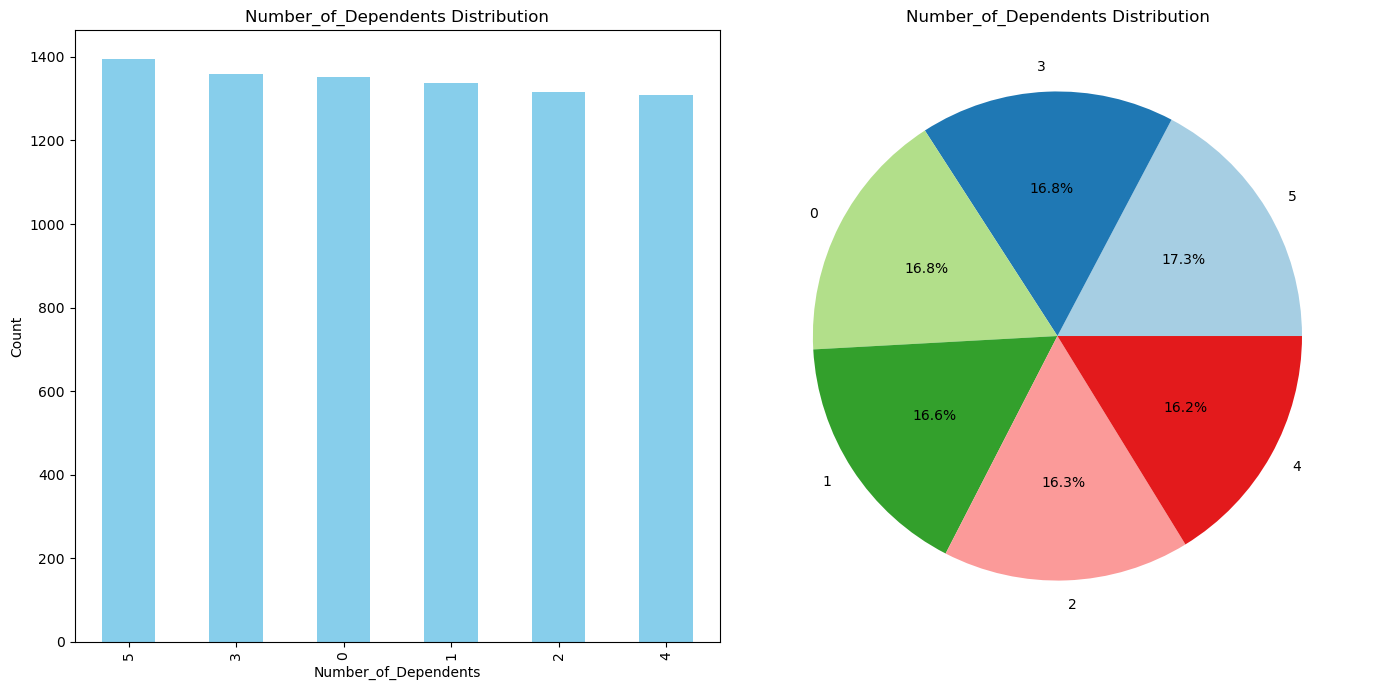



Univariate Analysis for Location:

Frequency Count:
Urban       5791
Suburban    1525
Rural        753
Name: Location, dtype: int64

Mode:
Urban


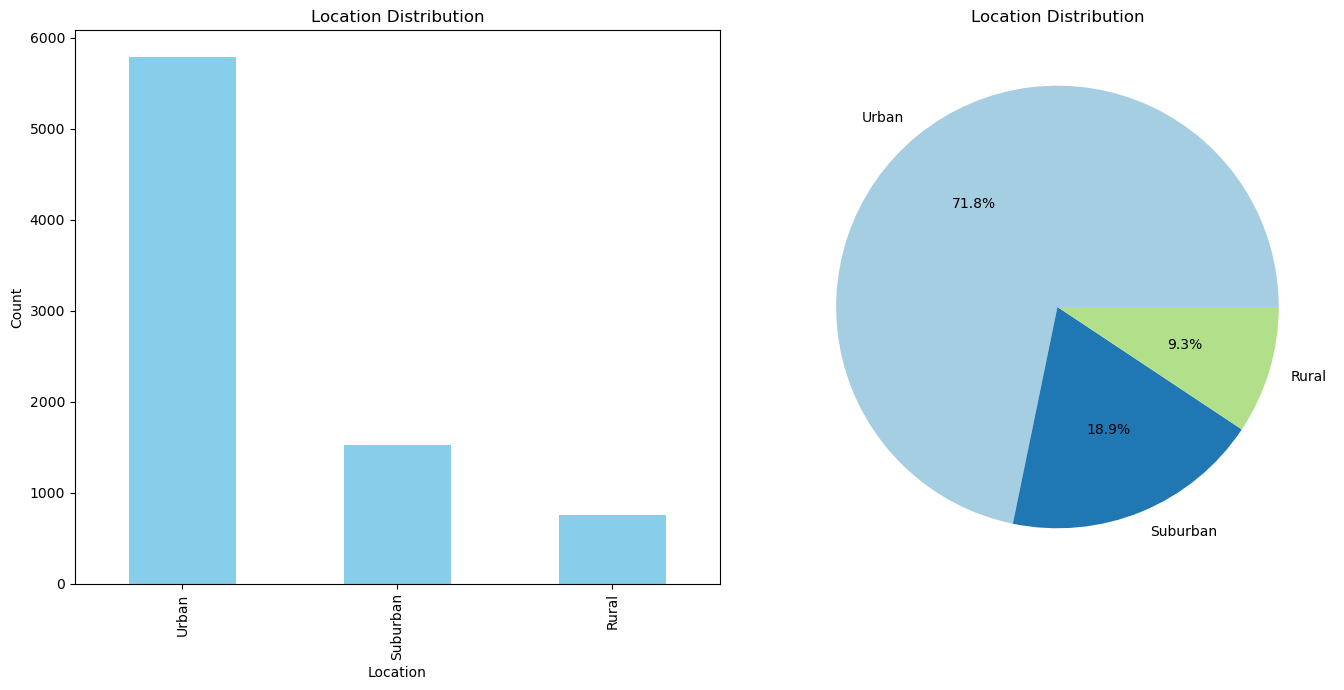



Univariate Analysis for Marital_Status:

Frequency Count:
Married     4123
Single      3171
Divorced     775
Name: Marital_Status, dtype: int64

Mode:
Married


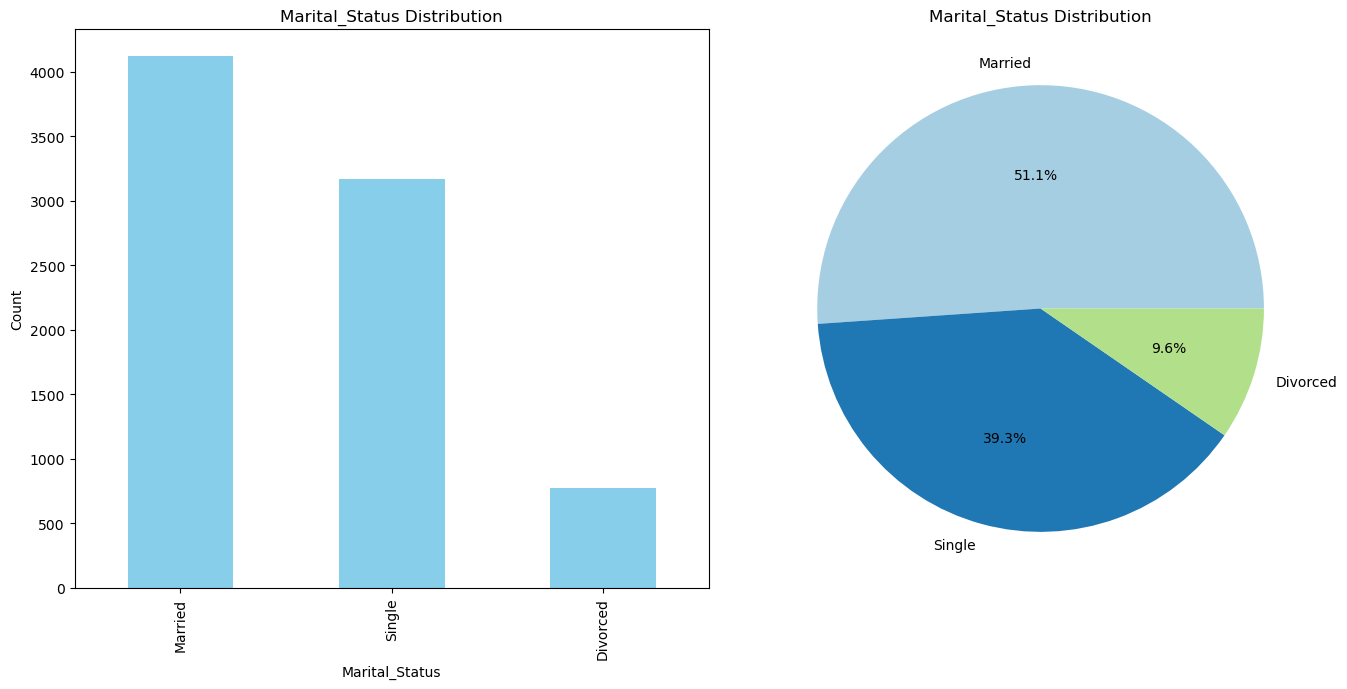



Univariate Analysis for Employment_Status:

Frequency Count:
Full-time        4057
Part-time        2377
Self-employed    1635
Name: Employment_Status, dtype: int64

Mode:
Full-time


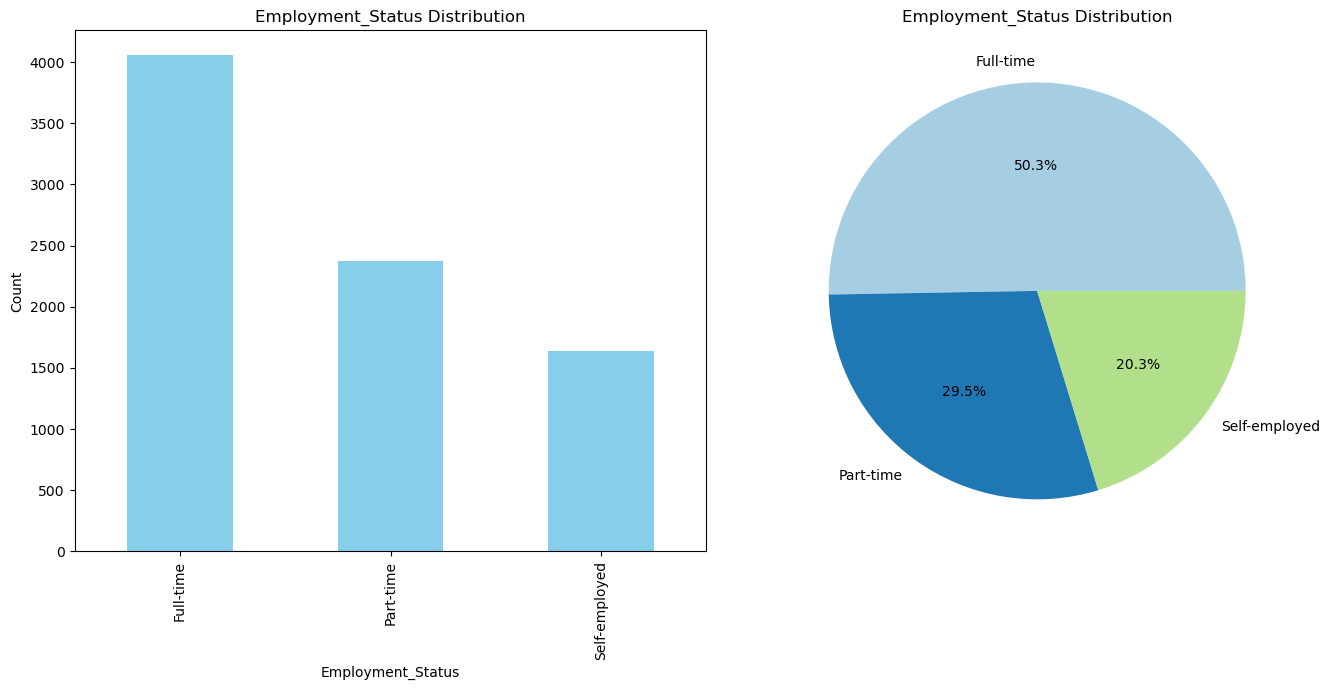



Univariate Analysis for Household_Size:

Frequency Count:
1    1179
3    1165
6    1164
5    1146
2    1145
7    1139
4    1131
Name: Household_Size, dtype: int64

Mode:
1


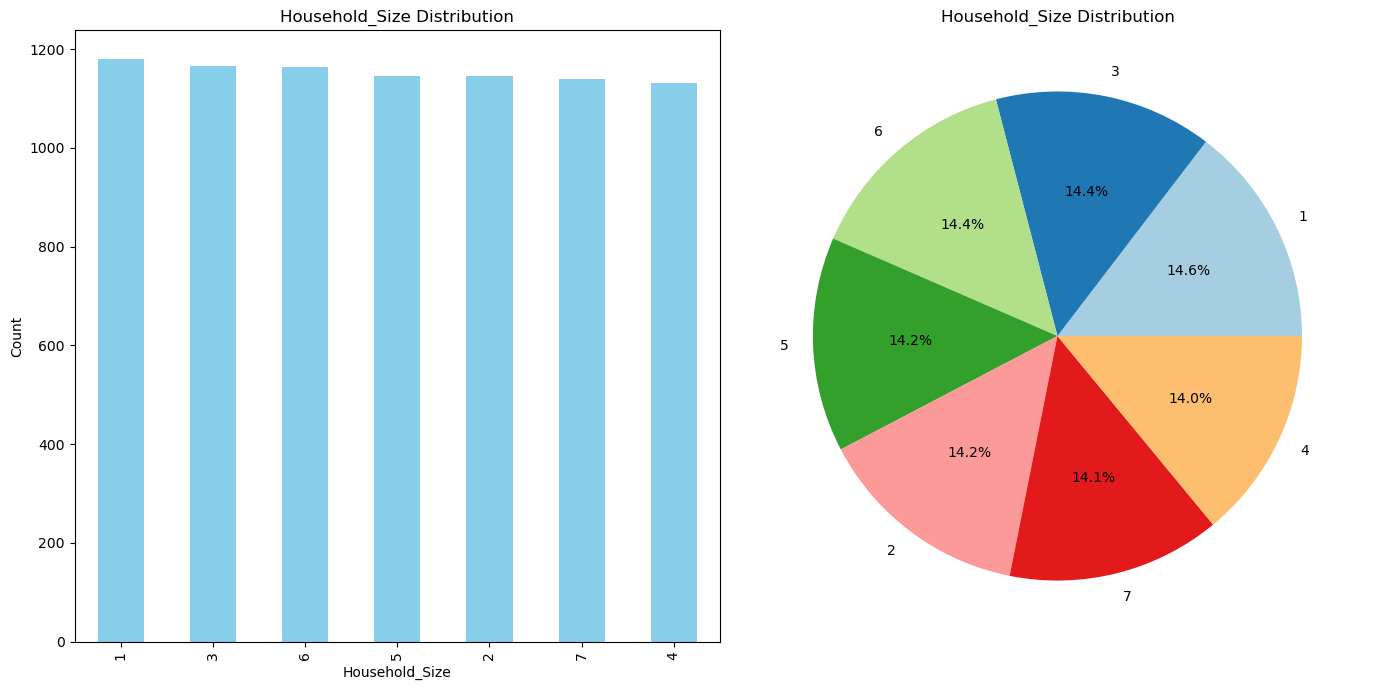



Univariate Analysis for Homeownership_Status:

Frequency Count:
Own     5056
Rent    3013
Name: Homeownership_Status, dtype: int64

Mode:
Own


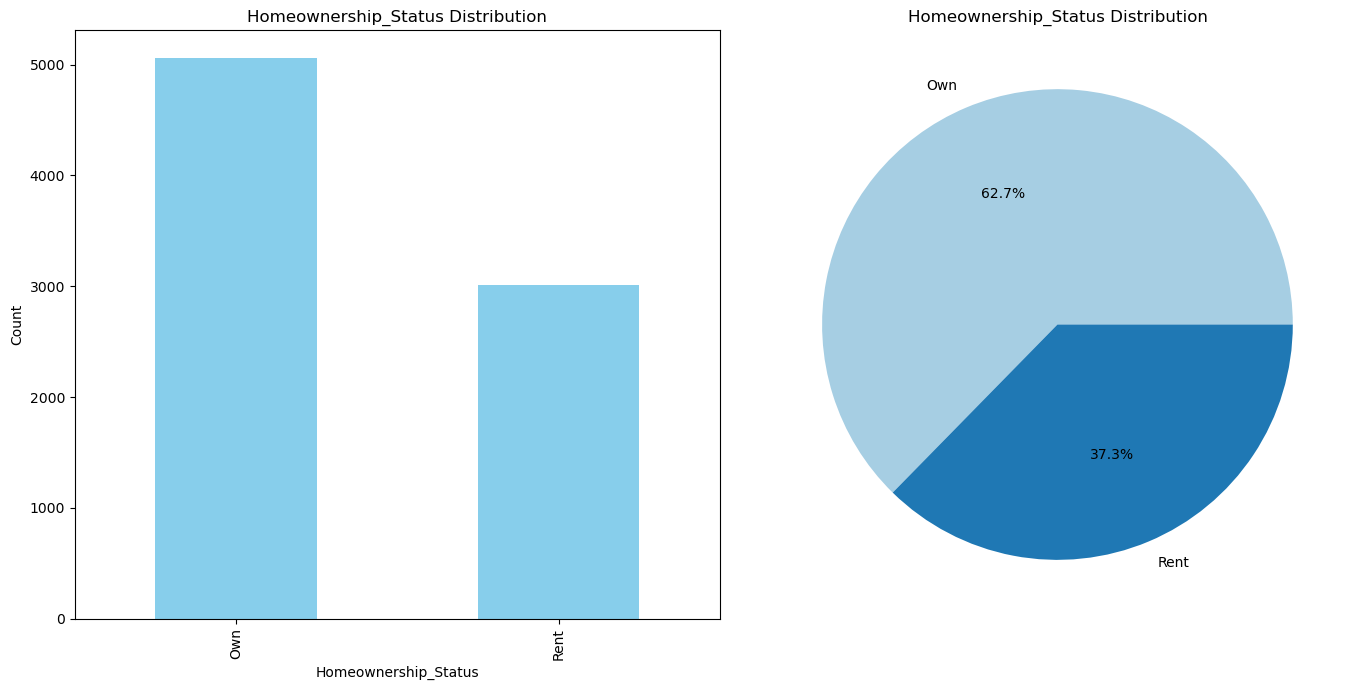



Univariate Analysis for Type_of_Housing:

Frequency Count:
Single-family home    3280
Apartment             3170
Townhouse             1619
Name: Type_of_Housing, dtype: int64

Mode:
Single-family home


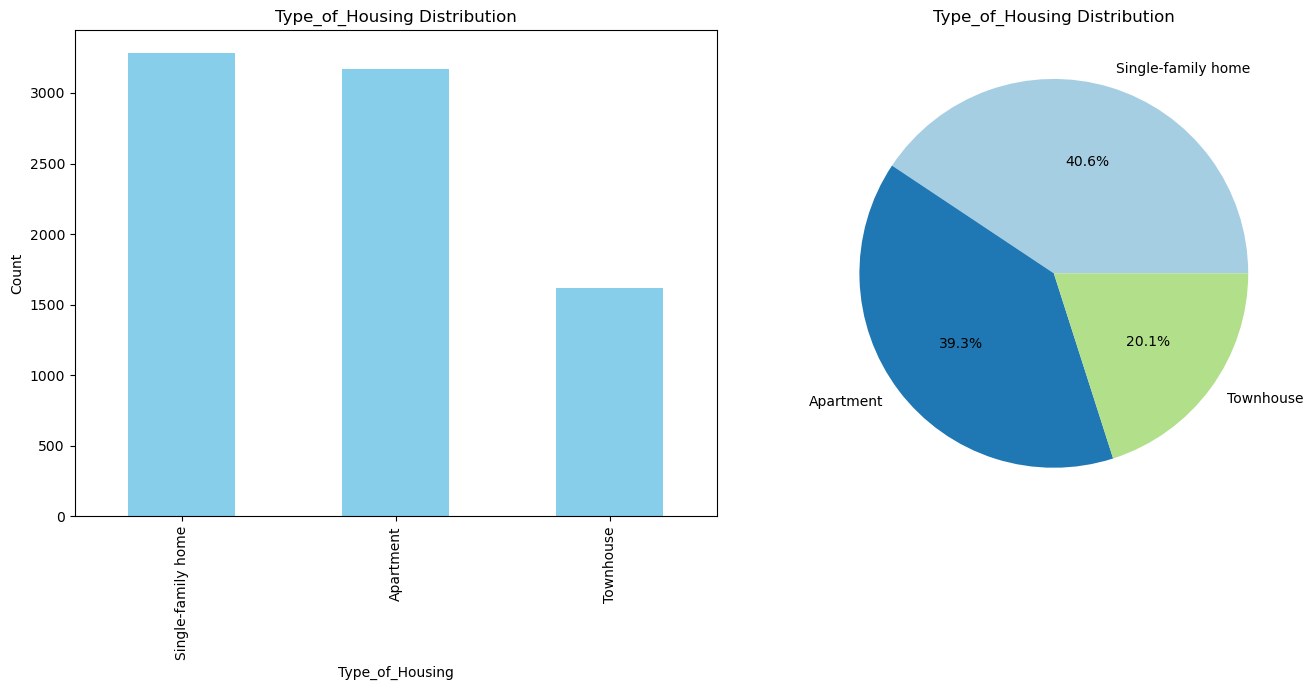



Univariate Analysis for Gender:

Frequency Count:
Male      4124
Female    3945
Name: Gender, dtype: int64

Mode:
Male


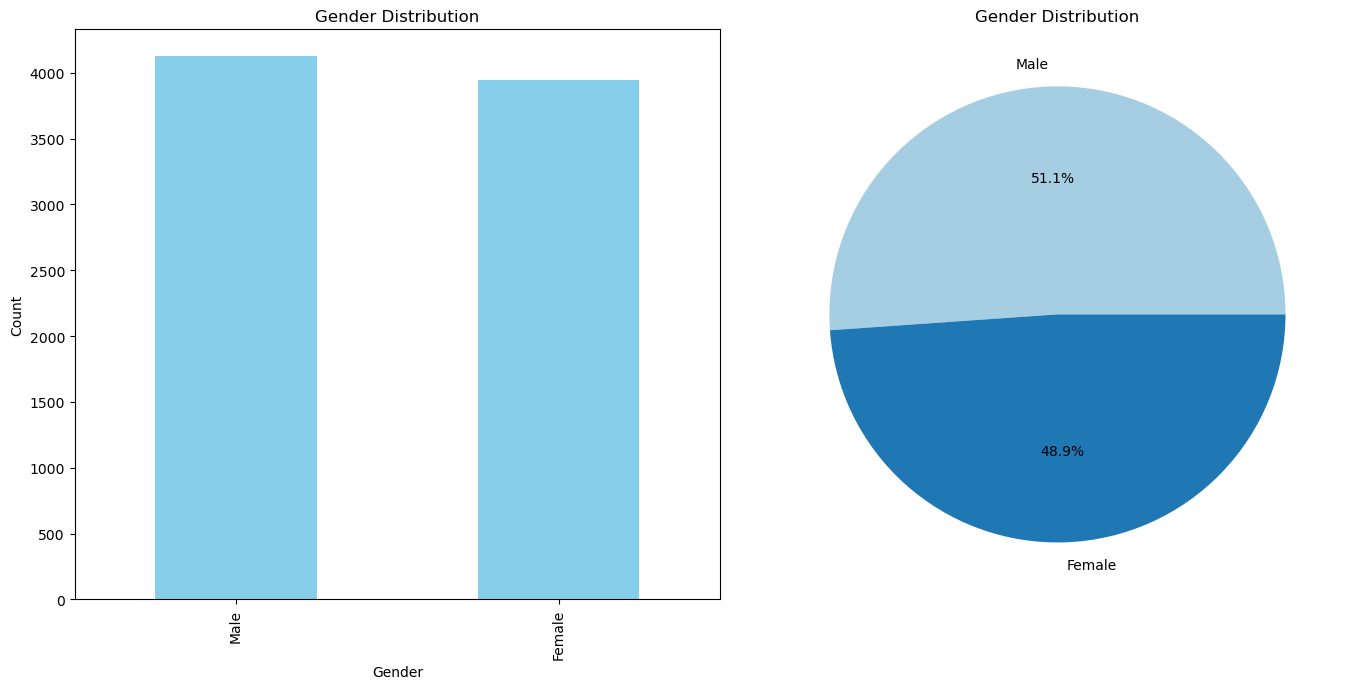



Univariate Analysis for Primary_Mode_of_Transportation:

Frequency Count:
Public transit    3276
Car               2414
Biking            1553
Walking            826
Name: Primary_Mode_of_Transportation, dtype: int64

Mode:
Public transit


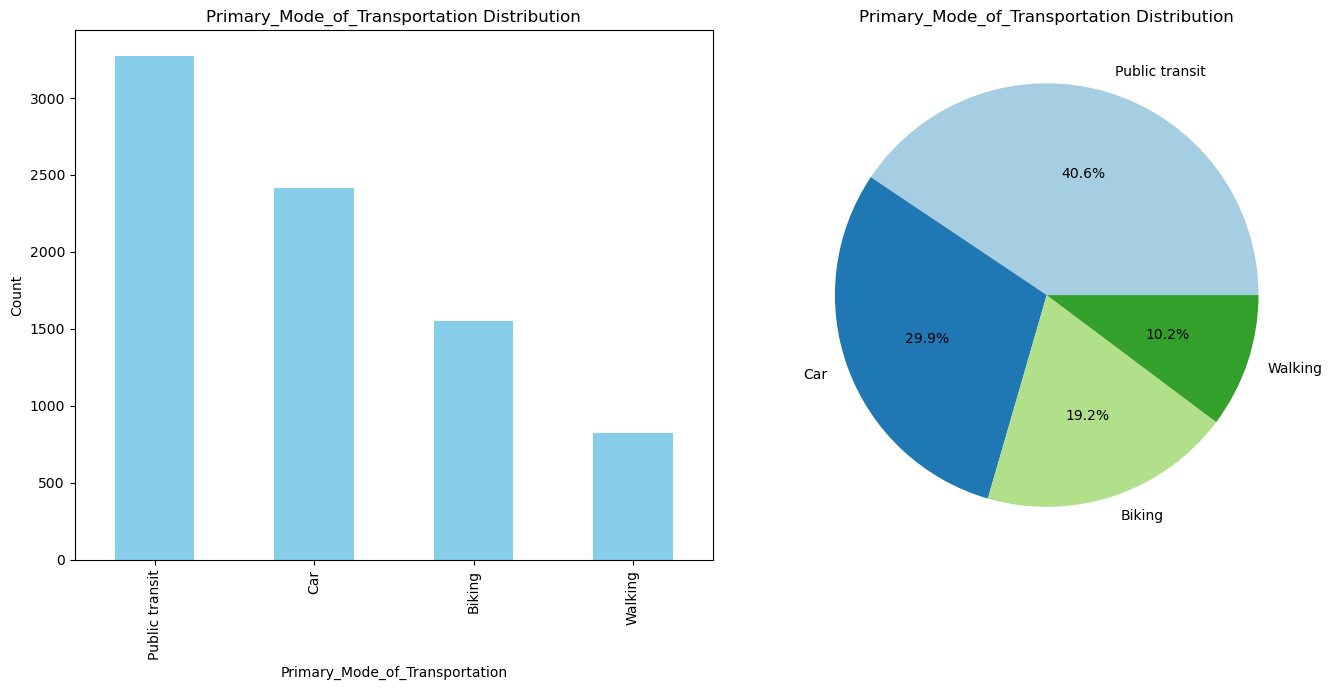

In [32]:
for column in df:
    

    if column != 'Log_Age' and column != 'BoxCox_Income':
        print(f"Univariate Analysis for {column}:")
        # Frequency count
        counts = df[column].value_counts()
        print("\nFrequency Count:")
        print(counts)

        # Mode
        mode = df[column].mode()[0]
        print("\nMode:")
        print(mode)

        # Bar plot
        plt.figure(figsize=(14, 7))
    
        plt.subplot(1, 2, 1)
        counts.plot(kind='bar', color='skyblue')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')

        # Pie chart
        plt.subplot(1, 2, 2)
        counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors)
        plt.title(f'{column} Distribution')
        plt.ylabel('')

        plt.tight_layout()
        plt.show()
        print("\n" + "="*50 + "\n")

# Bivariate Analysis 

In [33]:
# correaltion between age and income
corr_coeff = np.corrcoef(df['Log_Age'], df['BoxCox_Income'])[0, 1]
print(f"Pearson correlation coefficient: {corr_coeff}")

Pearson correlation coefficient: 0.0005785269663000029


In [34]:
df.columns

Index(['Education_Level', 'Occupation', 'Number_of_Dependents', 'Location',
       'Marital_Status', 'Employment_Status', 'Household_Size',
       'Homeownership_Status', 'Type_of_Housing', 'Gender',
       'Primary_Mode_of_Transportation', 'Log_Age', 'BoxCox_Income'],
      dtype='object')

In [35]:
# # # One-hot encoding each categorical column using a for loop
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)
for column in categorical_columns:
    dummies = pd.get_dummies(df[column], prefix=column, drop_first=True)
    df = pd.concat([df, dummies], axis=1)
    df.drop(column, axis=1, inplace=True)

Index(['Education_Level', 'Occupation', 'Location', 'Marital_Status',
       'Employment_Status', 'Homeownership_Status', 'Type_of_Housing',
       'Gender', 'Primary_Mode_of_Transportation'],
      dtype='object')


In [36]:
df.head()

,Number_of_Dependents,Household_Size,Log_Age,BoxCox_Income,Education_Level_Doctorate,Education_Level_High School,Education_Level_Master's,Occupation_Finance,Occupation_Healthcare,Occupation_Others,...,Marital_Status_Single,Employment_Status_Part-time,Employment_Status_Self-employed,Homeownership_Status_Rent,Type_of_Housing_Single-family home,Type_of_Housing_Townhouse,Gender_Male,Primary_Mode_of_Transportation_Car,Primary_Mode_of_Transportation_Public transit,Primary_Mode_of_Transportation_Walking
0,5,7,4.043051,0.845274,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,7,4.248495,0.845274,0,1,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2,1,7,3.850148,0.845274,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
3,2,1,3.496508,0.845274,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3,4,4.110874,0.845276,0,0,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1


# Multiple Regression

In [37]:
feature_cols = [i for i in df if i!='BoxCox_Income']
x = df[feature_cols]
y = df.BoxCox_Income

***Train-test split***

In [38]:
from sklearn import model_selection as ms
xtrain, xtest, ytrain, ytest = ms.train_test_split(x,y,test_size=0.3, random_state=42)

***Standardizing the dataset***

In [39]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

***Training the model***

In [40]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(xtrain,ytrain)

LinearRegression()

***Checking the intercept and the coefficients***

In [41]:
print(f'The intercept is {lm.intercept_}') #gives the intercept
print(f'The coefficient is {lm.coef_}') # gives the coefficient

The intercept is 0.8452742321259896
The coefficient is [-6.07447805e-10  3.57004081e-09  7.50675213e-09 -3.14870289e-08
 -5.88132560e-09 -5.30860286e-09 -1.93571262e-08  1.08375933e-08
 -4.44880331e-09 -1.40911986e-08 -3.12532669e-08 -4.53767887e-08
  9.77397390e-09  9.06517968e-09  7.19686101e-09 -1.64816117e-08
  7.77657472e-08 -2.20338755e-08 -1.64464237e-08  6.77260832e-09
 -1.42326265e-08 -1.00576886e-08 -5.58263750e-09]


***Prediction***

In [42]:
preds_train = lm.predict(xtrain)
preds_test =  lm.predict(xtest)

***Assesing Model Performance***

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
print(f"RMSE for train daata is : {np.sqrt(mean_squared_error(ytrain,preds_train))}")
print(f'R2 for train data is : {r2_score(ytrain,preds_train)}')
print(f'RMSE for test data is : {np.sqrt(mean_squared_error(ytest,preds_test))}')
print(f'R2 for test data is : {r2_score(ytest,preds_test)}')

RMSE for train daata is : 5.942168350311504e-07
R2 for train data is : 0.027386081867823875
RMSE for test data is : 5.894042003962541e-07
R2 for test data is : 0.026266711716154023


***Multiple Linear Regression using statsmodels***

In [44]:
import statsmodels.api as sm

# Fit your model for
model_trained = sm.OLS(ytrain, sm.add_constant(preds_train)).fit()

# Get the adjusted R-squared for trained data
print("Adjusted R-squared for trained data:", model_trained.rsquared_adj)

# Get the adjusted R-squared for test data
model_tested = sm.OLS(ytest, sm.add_constant(preds_test)).fit()
print("Adjusted R-squared for test data:", model_tested.rsquared_adj)

Adjusted R-squared for trained data: 0.02721378862455681
Adjusted R-squared for test data: 0.025956120034500874


In [45]:
# Another way
xtrain = sm.add_constant(xtrain)
model = sm.OLS(ytrain,xtrain).fit()

In [46]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          BoxCox_Income   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     6.885
Date:                Mon, 24 Jun 2024   Prob (F-statistic):           7.80e-22
Time:                        07:01:00   Log-Likelihood:                 72956.
No. Observations:                5648   AIC:                        -1.459e+05
Df Residuals:                    5624   BIC:                        -1.457e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8453   7.92e-09   1.07e+08      0.000       0.845       0.845
x1         -6.074e-10   7.94e-09     -0.077      0.939   -1.62e-08     1.5e-08
x2           3.57e-09   7.94e-09      0.450      0.653    -1.2e-08    1.91e-08
x3          7.507e-09   7.93e-09      0.946      0.344   -8.05e-09    2.31e-08
x4         -3.149e-08   8.23e-09     -3.827      0.000   -4.76e-08   -1.54e-08
x5         -5.881e-09   8.77e-09     -0.670      0.503   -2.31e-08    1.13e-08
x6         -5.309e-09   8.76e-09     -0.606      0.545   -2.25e-08    1.19e-08
x7         -1.936e-08   1.04e-08     -1.857      0.063   -3.98e-08    1.08e-09
x8          1.084e-08   1.16e-08      0.936      0.349   -1.18e-08    3.35e-08
x9         -4.449e-09   1.04e-08     -0.429      0.668   -2.48e-08    1.59e-08
x10        -1.409e-08   1.12e-08     -1.258      0.208    -3.6e-08    7.86e-09
x11        -3.125e-08   1.26e-08     -2.486      0.013   -5.59e-08    -6.6e-09
x12        -4.538e-08   1.26e-08     -3.611      0.000      -7e-08   -2.07e-08
x13         9.774e-09   1.39e-08      0.705      0.481   -1.74e-08     3.7e-08
x14         9.065e-09   1.39e-08      0.654      0.513   -1.81e-08    3.62e-08
x15         7.197e-09   8.41e-09      0.856      0.392   -9.29e-09    2.37e-08
x16        -1.648e-08   8.39e-09     -1.964      0.050   -3.29e-08   -3.37e-11
x17         7.777e-08   7.95e-09      9.784      0.000    6.22e-08    9.33e-08
x18        -2.203e-08   8.74e-09     -2.522      0.012   -3.92e-08   -4.91e-09
x19        -1.645e-08   8.73e-09     -1.883      0.060   -3.36e-08    6.72e-10
x20         6.773e-09   7.94e-09      0.853      0.394    -8.8e-09    2.23e-08
x21        -1.423e-08   1.06e-08     -1.348      0.178   -3.49e-08    6.47e-09
x22        -1.006e-08   1.07e-08     -0.940      0.347    -3.1e-08    1.09e-08
x23        -5.583e-09   9.24e-09     -0.604      0.546   -2.37e-08    1.25e-08
==============================================================================
Omnibus:                      568.444   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3111.471
Skew:                          -0.324   Prob(JB):                         0.00
Kurtosis:                       6.578   Cond. No.                         3.21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Improving the model 

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                                          Feature        VIF
0                            Number_of_Dependents   3.091035
1                                  Household_Size   4.832851
2                                         Log_Age  29.214818
3                       Education_Level_Doctorate   1.129388
4                     Education_Level_High School   1.699021
5                        Education_Level_Master's   1.603074
6                              Occupation_Finance   2.009746
7                           Occupation_Healthcare   2.976377
8                               Occupation_Others   1.975615
9                           Occupation_Technology   2.567061
10                              Location_Suburban   2.891579
11                                 Location_Urban   8.154802
12                         Marital_Status_Married   5.959597
13                          Marital_Status_Single   4.806212
14                    Employment_Status_Part-time   1.582407
15                Employ